# Tomato Prices in Different States of India #

#### Importing Libraries ####

In [3]:
import pandas as pd
from lxml import objectify
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Path of files ####


In [4]:
path = ['/home/user/Downloads/Tomato_2014.xml',
        '/home/user/Downloads/Tomato_2015.xml', 
        '/home/user/Downloads/Tomato_2016.xml']

#### Creating an empty Dataframe ####

In [5]:
df = pd.DataFrame()

#### Function for extracting data from files and storing in list ####

In [6]:
def daata():
    all_data = []
    rt = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    for i in range(0, len(rt)):
        obj = rt[i].getchildren()
        column_value = []
        for j in range(0, length_column):
            column_value.append(obj[j].text)
        all_data.append(column_value)
    return all_data

#### Creating Different DataFrames for different files and appending them in one ####

In [7]:
for k in range(0, len(path)):
    xml = objectify.parse(open(path[k]))
    root = xml.getroot()
    column_header = []
    column_name = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    for item in column_name:
        column_header.append(item.values()[0])
    length_column = len(column_header)
    final_data = daata()
    df = df.append(pd.DataFrame(data = final_data,columns = column_header),ignore_index = True)

#### Assigning Every month with Season ####

In [8]:
df.loc[df['Arrival_Date'].str.contains('/01/') | \
       df['Arrival_Date'].str.contains('/12/') | \
       df['Arrival_Date'].str.contains('/11/'), "Seasons"] = "Winter"
df.loc[df['Arrival_Date'].str.contains('/04/') | \
       df['Arrival_Date'].str.contains('/05/') | \
       df['Arrival_Date'].str.contains('/06/') | \
       df['Arrival_Date'].str.contains('/07/') | \
       df['Arrival_Date'].str.contains('/08/'),"Seasons"] = "Summer"
df.loc[df['Arrival_Date'].str.contains('/02/') | \
       df['Arrival_Date'].str.contains('/03/'), "Seasons"] = "Spring"
df.loc[df['Arrival_Date'].str.contains('/09/') | \
       df['Arrival_Date'].str.contains('/10/'), "Seasons"] = "Autumn"

#### Creating a new dataframe having mean price of tomato perseason for every year ####

In [9]:
new_column_header1 = ['State','year', 'Winter', 'Summer', 'Spring', 'Autumn']
ar1 = []
state = df.State.unique()
year = ['2014','2015','2016']
for i in range(0, len(state)):
    for j in range(0,len(year)):
        r = []
        r.append(state[i])
        r.append(year[j])
        r.append(df[(df.State == state[i]) & \
                    (df.Seasons == 'Winter') & \
                    (df.Arrival_Date.str.contains(year[j]))].Max_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Seasons == 'Summer') & \
                    (df.Arrival_Date.str.contains(year[j]))].Max_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Seasons == 'Spring') & \
                    (df.Arrival_Date.str.contains(year[j]))].Max_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Seasons == 'Autumn') & \
                    (df.Arrival_Date.str.contains(year[j]))].Max_x0020_Price.astype(float).mean())
        ar1.append(r)
new_df1 = pd.DataFrame(data = ar1, columns = new_column_header1)

In [10]:
new_df1_temp = (new_df1['year'] == '2015')
new_df1 = new_df1[new_df1_temp]
new_df1.reset_index(inplace=True)
new_df1 = new_df1.fillna(0)

### 1. Plotting graph for Prices of tomato in States for every season ###

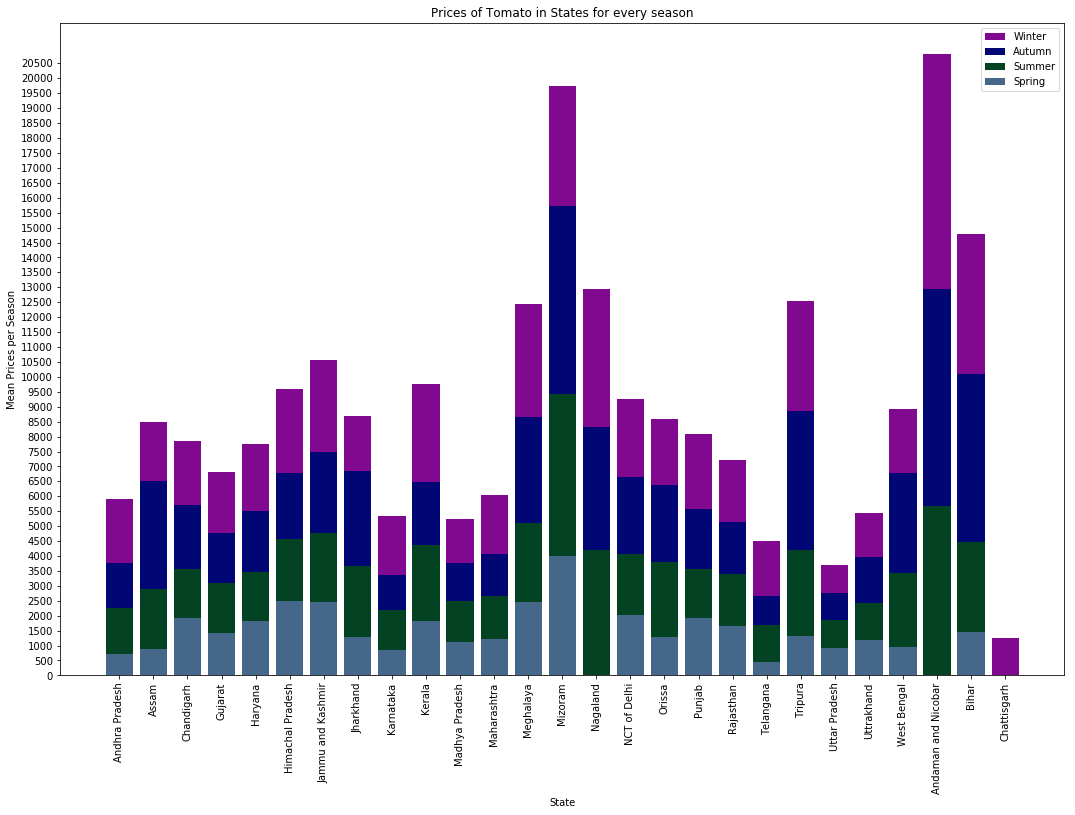

In [12]:
plt.xlabel('State',)
plt.ylabel('Mean Prices per Season')
plt.title('Prices of Tomato in States for every season')
asd = list(new_df1['State'])
ind = list(new_df1['State'].index)
a = new_df1['Spring']
b = new_df1['Summer']
c = new_df1['Autumn']
d = new_df1['Winter']
fig_size=[18,12]
p1 = plt.bar(ind, d, color = '#800990',  bottom = [a[j] + b[j] + c[j] for j in range(len(a))])
p3 = plt.bar(ind, b, color = '#034324', bottom = a)
p2 = plt.bar(ind, c, color = '#000673', bottom = [a[j] + b[j] for j in range(len(a))])
p4 = plt.bar(ind, a, color = '#456789')

plt.xticks(ind, asd, rotation = 'vertical')
plt.yticks(np.arange(0, 21000, 500))
plt.rcParams["figure.figsize"] = fig_size
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Winter', 'Autumn', 'Summer', 'Spring'))
plt.show()

#### Finding mean value of price of every year for each State ####

In [13]:
new_column_header2 = ['State','year', 'Min', 'Max', 'Mode']
ar2 = []
state = df.State.unique()
year = ['2014','2015','2016']
for i in range(0, len(state)):
    for j in range(0,len(year)):
        r = []
        r.append(state[i])
        r.append(year[j])
        r.append(df[(df.State == state[i]) & 
                    (df.Arrival_Date.str.contains(year[j]))].Min_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Arrival_Date.str.contains(year[j]))].Max_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Arrival_Date.str.contains(year[j]))].Modal_x0020_Price.astype(float).mean())
        ar2.append(r)
new_df2 = pd.DataFrame(data = ar2, columns = new_column_header2)
new_df2.sort_values('year')


,State,year,Min,Max,Mode
0,Andhra Pradesh,2014,986.251228,1327.194386,1155.632982
42,Nagaland,2014,3389.130435,3888.198758,3639.130435
36,Meghalaya,2014,1935.526316,2663.815789,2294.078947
45,NCT of Delhi,2014,950.100320,1757.302028,1379.860192
33,Maharashtra,2014,1030.735335,1735.783226,1384.932631
48,Orissa,2014,2166.793450,2528.351719,2366.428517
30,Madhya Pradesh,2014,848.748453,1424.084208,1148.468927
51,Punjab,2014,1318.655884,1643.706606,1496.983825
27,Kerala,2014,1864.318523,2195.774213,2073.896852
54,Rajasthan,2014,1177.489167,1744.780934,1545.312470


In [14]:
new_df2_temp = (new_df2['year'] == '2015')
new_df2_1 = new_df2[new_df2_temp]

### 2.Plotting graph to show variation of price per state ###

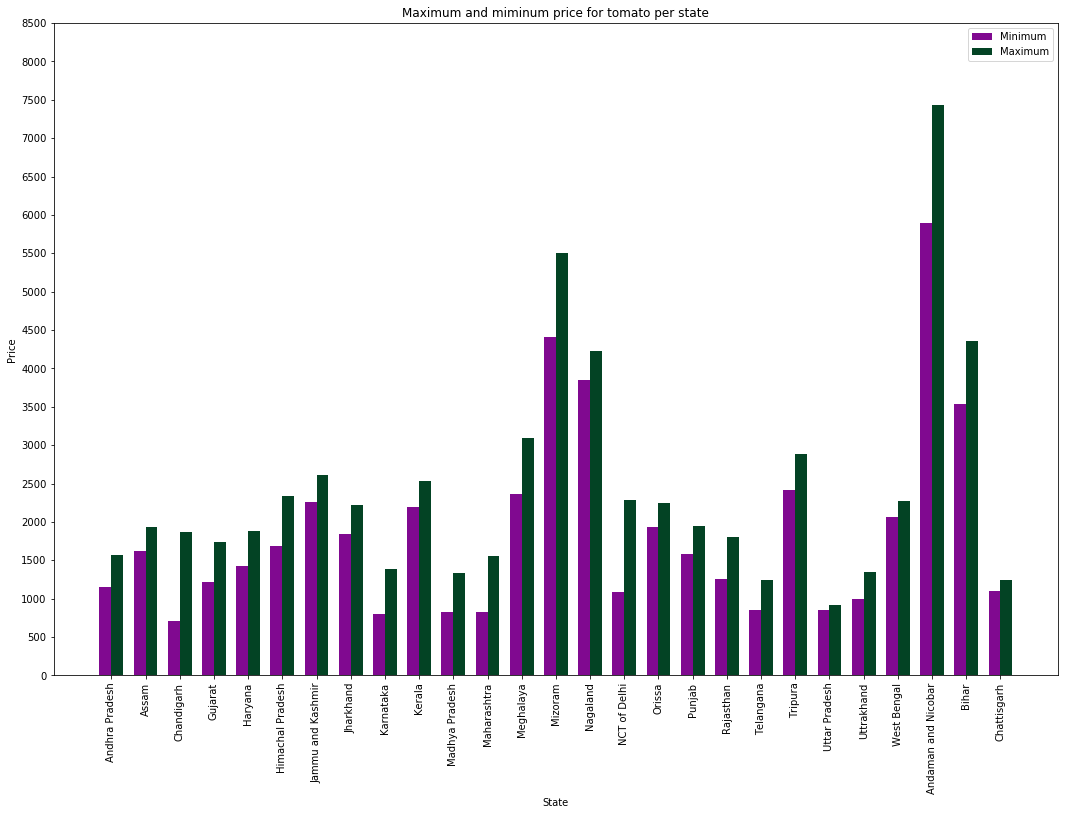

In [15]:
plt.xlabel('State',)
plt.ylabel('Price')
plt.title('Maximum and miminum price for tomato per state')
asd = list(new_df2_1['State'])
ind = np.arange(len(asd))
a = new_df2_1['Min']
b = new_df2_1['Max']
width = 0.35 
p1 = plt.bar(ind - width/2, a, width=0.35, color='#800990')
p2 = plt.bar(ind + width/2, b, width=0.35, color='#034324')

plt.xticks(ind, asd, rotation='vertical')
plt.yticks(np.arange(0, 9000, 500))
plt.legend((p1[0], p2[0]), ('Minimum', 'Maximum'))
plt.show()

In [19]:
new_df2_2 = new_df2.pivot(index = 'State', columns = 'year', values = 'Mode')
new_df2_2 = new_df2_2.fillna(0)

### 3. Plotting graph for prices of tomato in every state with respect to year ###

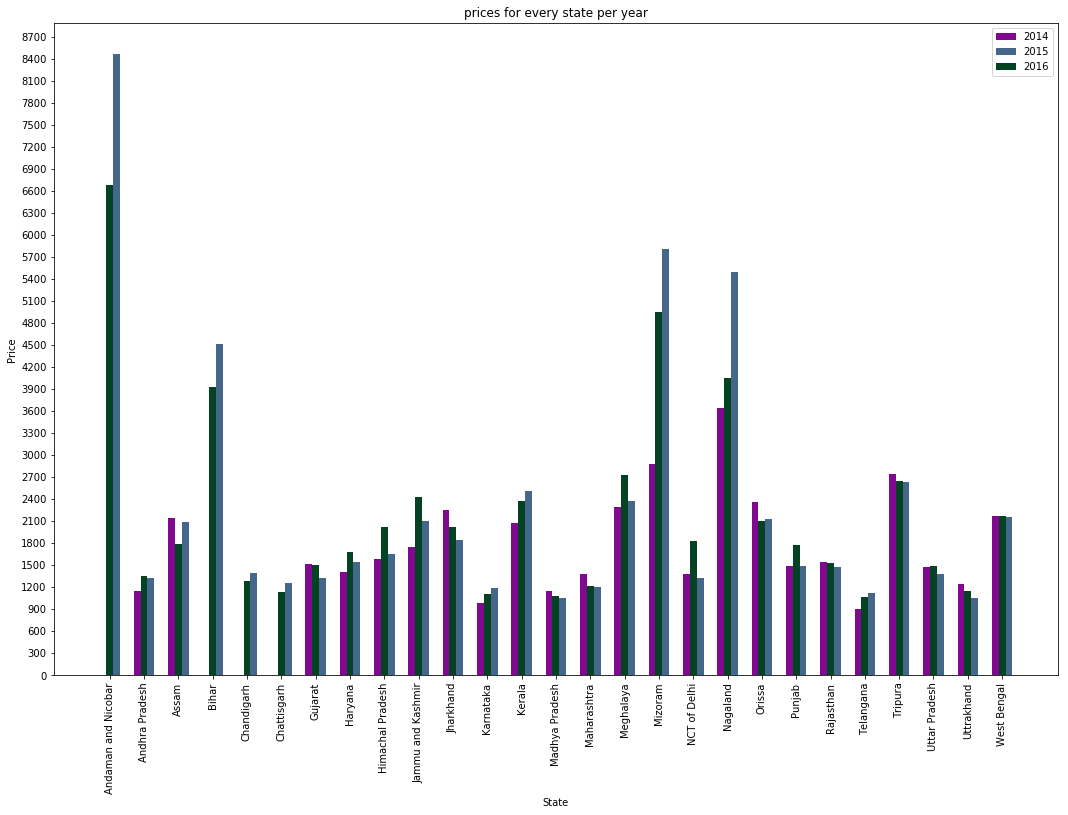

In [22]:
plt.xlabel('State')
plt.ylabel('Price')
plt.title('prices for every state per year')
asd = list(new_df2_2.index)
ind = np.arange(len(asd))
a = new_df2_2['2014']
b = new_df2_2['2015']
c = new_df2_2['2016']
width = 0.2
p1 = plt.bar(ind - 0.2, a, width = 0.2, color = '#800990')
p2 = plt.bar(ind, b, width = 0.2, color = '#034324')
p2 = plt.bar(ind + 0.2, c, width = 0.2, color = '#456789')
plt.xticks(ind, asd, rotation = 'vertical')
plt.yticks(np.arange(0, 8701, 300))
plt.legend((p1[0], p2[0], p3[0]), ('2014', '2015', '2016'))

#### Creating dataframe with prices with respect to Variety for every state ####

In [23]:
new_column_header3 = ['State','Variety', 'Min', 'Max', 'Mode']
ar3 = []
state = df.State.unique()
variety = df.Variety.unique()
for i in range(0, len(state)):
    for j in range(0,len(variety)):
        r = []
        r.append(state[i])
        r.append(variety[j])
        r.append(df[(df.State == state[i]) & \
                    (df.Variety.str.contains(variety[j]))].Min_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Variety.str.contains(variety[j]))].Max_x0020_Price.astype(float).mean())
        r.append(df[(df.State == state[i]) & \
                    (df.Variety.str.contains(variety[j]))].Modal_x0020_Price.astype(float).mean())
        ar3.append(r)
new_df3 = pd.DataFrame(data = ar3, columns = new_column_header3)

In [24]:
new_df3_temp = (new_df3['Variety'] == 'Other')
new_df3 = new_df3[new_df3_temp]

### 4. Plotting graph to show variation of price for different variety ###

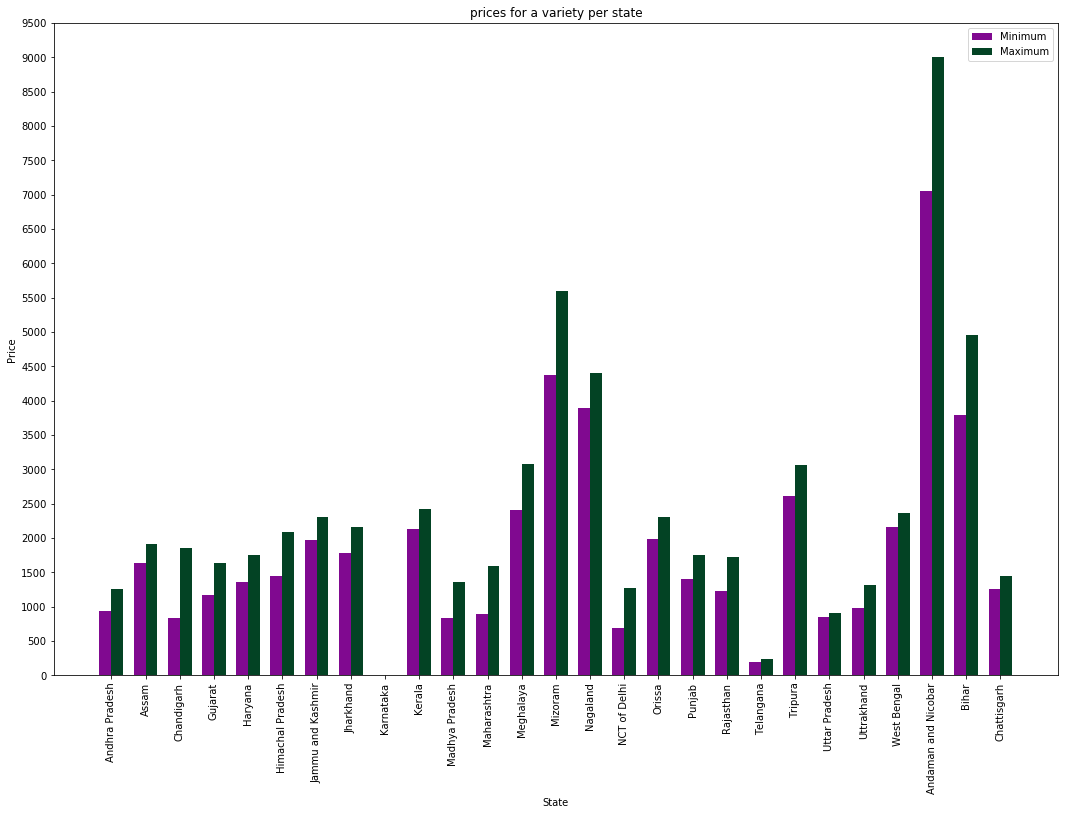

In [25]:
plt.xlabel('State',)
plt.ylabel('Price')
plt.title('prices for a variety per state')
asd = list(new_df3['State'])
ind = np.arange(len(asd))
a = new_df3['Min']
b = new_df3['Max']
width = 0.35 
p1 = plt.bar(ind - width/2, a, width = 0.35, color = '#800990')
p2 = plt.bar(ind + width/2, b, width = 0.35, color = '#034324')

plt.xticks(ind, asd, rotation = 'vertical')
plt.yticks(np.arange(0, 10000, 500))
plt.legend((p1[0], p2[0]), ('Minimum', 'Maximum'))
plt.show()

#### Prices of different variety varied every year ####

In [26]:
new_column_header3 = ['Variety', 'Mode','Year']
ar3 = []
variety = df.Variety.unique()
for i in range(0,len(year)):
    for j in range(0,len(variety)):
        r = []
        r.append(variety[j])
        r.append(df[(df.Arrival_Date.str.contains(year[i])) & \
                    (df.Variety.str.contains(variety[j]))].Modal_x0020_Price.astype(float).mean())
        r.append(year[i])
        ar3.append(r)
new_df4 = pd.DataFrame(data = ar3, columns = new_column_header3)
new_df5 = new_df4.pivot(index = 'Variety', columns = 'Year', values = 'Mode')

### 5. Plotting a graph to show variation of prices in different variety per year ###

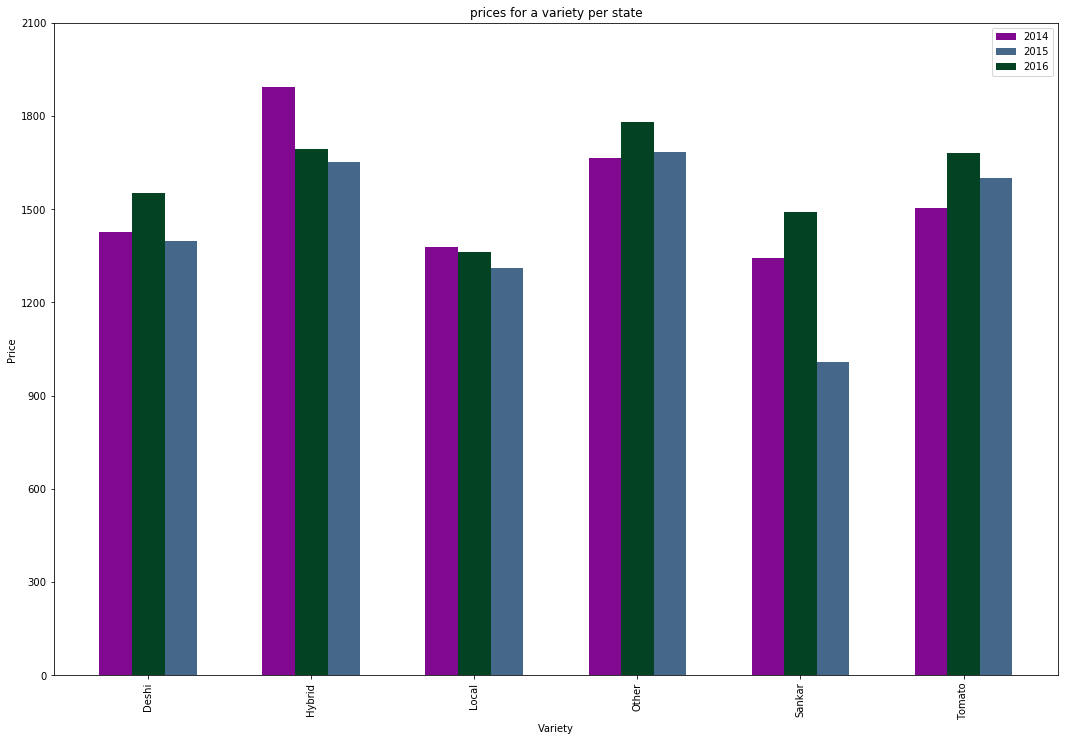

In [27]:
plt.xlabel('Variety')
plt.ylabel('Price')
plt.title('prices for a variety per state')
asd = list(new_df5.index)
ind = np.arange(len(asd))
new_df5.describe
a = new_df5['2014']
b = new_df5['2015']
c = new_df5['2016']
width = 0.2
p1 = plt.bar(ind - 0.2, a, width = 0.2, color = '#800990')
p2 = plt.bar(ind, b, width = 0.2, color = '#034324')
p2 = plt.bar(ind + 0.2, c, width = 0.2, color = '#456789')
plt.xticks(ind, asd, rotation = 'vertical')
plt.yticks(np.arange(0, 2101, 300))
plt.legend((p1[0], p2[0], p3[0]), ('2014', '2015', '2016'))